In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import matplotlib.pylab as plt
from tensorflow.keras.layers import Dropout

In [2]:
df = pd.read_csv("BTC-USD.csv")
    

In [3]:
given_data_set = df
scaler = MinMaxScaler()
given_data_set["Open"] = scaler.fit_transform(given_data_set["Open"].values.reshape(-1,1))
given_data_set

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.004289,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,0.004155,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,0.003669,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,0.003232,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,0.003431,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3122,2023-04-05,0.415491,28739.238281,27843.763672,28177.984375,28177.984375,17052315986
3123,2023-04-06,0.415573,28178.384766,27738.759766,28044.140625,28044.140625,13837809380
3124,2023-04-07,0.413550,28111.593750,27794.031250,27925.859375,27925.859375,10861680497
3125,2023-04-08,0.411792,28159.863281,27883.386719,27947.794922,27947.794922,9373255556


In [18]:

def create_sequences(data, seq_length):
    x = []
    y = []
    
    for i in range(0, len(data) - seq_length):
        x.append(data[i:(i+seq_length), 0])
        y.append(data[i+seq_length, 0])
    
    return np.array(x), np.array(y)

seq_length = 60
X, y = create_sequences(given_data_set[['Open']].values, seq_length)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [19]:
predictor_model = Sequential()
predictor_model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
predictor_model.add(Dropout(0.2))
predictor_model.add(LSTM(50, return_sequences=True))
predictor_model.add(Dropout(0.2))
predictor_model.add(LSTM(50))
predictor_model.add(Dropout(0.2))
predictor_model.add(Dense(1))

predictor_model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
predictor_model.fit(X, X, epochs=10, batch_size=32)

Epoch 1/10
96/96 [==============================] - 8s 40ms/step - loss: 0.0087
Epoch 2/10
96/96 [==============================] - 4s 38ms/step - loss: 0.0037
Epoch 3/10
96/96 [==============================] - 4s 39ms/step - loss: 0.0030
Epoch 4/10
96/96 [==============================] - 4s 39ms/step - loss: 0.0036
Epoch 5/10
96/96 [==============================] - 4s 38ms/step - loss: 0.0027
Epoch 6/10
96/96 [==============================] - 4s 39ms/step - loss: 0.0027
Epoch 7/10
96/96 [==============================] - 4s 40ms/step - loss: 0.0027
Epoch 8/10
96/96 [==============================] - 5s 47ms/step - loss: 0.0024
Epoch 9/10
96/96 [==============================] - 4s 41ms/step - loss: 0.0024
Epoch 10/10
96/96 [==============================] - 4s 44ms/step - loss: 0.0023


In [21]:
predicted_data = predictor_model.predict(X)
next_day_value = predicted_data[-1, -1]
print(next_day_value)

96/96 [==============================] - 2s 12ms/step
0.36326277


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)


In [25]:
sample_model = Sequential()
sample_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
sample_model.add(Dropout(0.2))
sample_model.add(LSTM(50, return_sequences=True))
sample_model.add(Dropout(0.2))
sample_model.add(LSTM(50))
sample_model.add(Dropout(0.2))
sample_model.add(Dense(1))

sample_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [26]:
history = sample_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data = (X_test, y_test) ,verbose=2)

Epoch 1/10
77/77 - 8s - loss: 0.0046 - accuracy: 4.0766e-04 - val_loss: 0.0039 - val_accuracy: 0.0016 - 8s/epoch - 109ms/step
Epoch 2/10
77/77 - 4s - loss: 0.0015 - accuracy: 4.0766e-04 - val_loss: 0.0030 - val_accuracy: 0.0016 - 4s/epoch - 46ms/step
Epoch 3/10
77/77 - 3s - loss: 0.0016 - accuracy: 4.0766e-04 - val_loss: 0.0028 - val_accuracy: 0.0016 - 3s/epoch - 44ms/step
Epoch 4/10
77/77 - 3s - loss: 0.0012 - accuracy: 4.0766e-04 - val_loss: 0.0023 - val_accuracy: 0.0016 - 3s/epoch - 43ms/step
Epoch 5/10
77/77 - 3s - loss: 0.0012 - accuracy: 4.0766e-04 - val_loss: 0.0026 - val_accuracy: 0.0016 - 3s/epoch - 45ms/step
Epoch 6/10
77/77 - 4s - loss: 0.0011 - accuracy: 4.0766e-04 - val_loss: 0.0017 - val_accuracy: 0.0016 - 4s/epoch - 47ms/step
Epoch 7/10
77/77 - 4s - loss: 0.0014 - accuracy: 4.0766e-04 - val_loss: 0.0033 - val_accuracy: 0.0016 - 4s/epoch - 47ms/step
Epoch 8/10
77/77 - 4s - loss: 0.0010 - accuracy: 4.0766e-04 - val_loss: 0.0035 - val_accuracy: 0.0016 - 4s/epoch - 48ms/step

In [29]:
from tensorflow.keras.callbacks import History

print(history.history)
sample_model_loss = history.history['loss']
sample_model_accuracy = history.history['accuracy']
sample_model_val_loss = history.history['val_loss']
sample_model_val_accuracy = history.history['val_accuracy']
print(history.history.keys())

{'loss': [0.00460352236405015, 0.0014772128779441118, 0.001619722112081945, 0.0011534412624314427, 0.0012271706946194172, 0.0011062088888138533, 0.0013664542930200696, 0.0010365683119744062, 0.0009134556166827679, 0.0009658506023697555], 'accuracy': [0.0004076640761923045, 0.0004076640761923045, 0.0004076640761923045, 0.0004076640761923045, 0.0004076640761923045, 0.0004076640761923045, 0.0004076640761923045, 0.0004076640761923045, 0.0004076640761923045, 0.0004076640761923045], 'val_loss': [0.003868415951728821, 0.003010626183822751, 0.002761123701930046, 0.00226068333722651, 0.0025617415085434914, 0.001662394730374217, 0.0033137425780296326, 0.003457009559497237, 0.0030196229927241802, 0.0016370743978768587], 'val_accuracy': [0.0016286644386127591, 0.0016286644386127591, 0.0016286644386127591, 0.0016286644386127591, 0.0016286644386127591, 0.0016286644386127591, 0.0016286644386127591, 0.0016286644386127591, 0.0016286644386127591, 0.0016286644386127591]}
dict_keys(['loss', 'accuracy', 'v

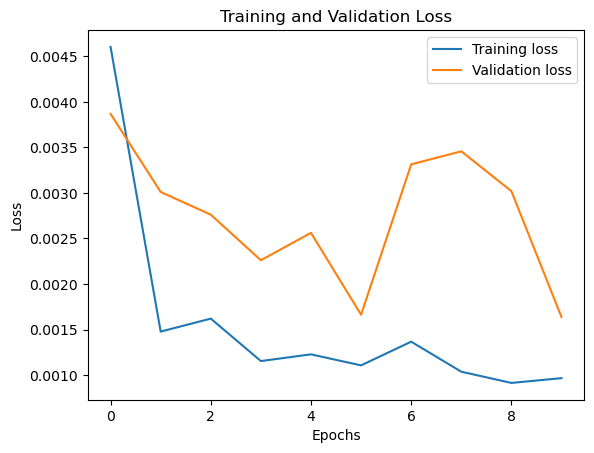

In [30]:
# get back to this later. By the end of today, need to have a validation/training loss graph.
# if possible, clean up everything and have a model 
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

